In [172]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import plotly
plotly.offline.init_notebook_mode(connected = True) #so that it plots locally
from datetime import date
from sklearn.linear_model import LinearRegression, HuberRegressor

In [4]:
#Ames Real Estate Dataset

data_real_estate=pd.read_csv("Data\Ames Real Estate Data.csv", low_memory=False)
#data_real_estate=pd.read_csv("Data\Ames Real Estate Data.csv", low_memory=False)
data_real_estate

,MapRefNo,GeoRefNo,Tier,Range,Prop_Addr,ZngCdPr,ZngCdSc,ZngOLPr,ZngOLSc,ClassPr_S,...,PA-Nmbr,PA-PreD,PA-Strt,PA-StSfx,PA-PostD,PA-UnTyp,PA-UntNo,Date,Source,NmbrBRs
0,520400001,520400001,0,0,4599 GEORGE W CARVER AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,...,4599,NaN,GEORGE W CARVER,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
1,520440010,520440010,0,0,4507 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,...,4507,NaN,EVEREST,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
2,520440020,520440020,0,0,4513 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,...,4513,NaN,EVEREST,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
3,520445001,520445001,0,0,3449 BARCELOS ST,FS-RL,NaN,NaN,NaN,RESIDENTIAL,...,3449,NaN,BARCELOS,ST,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
4,520445010,520445010,0,0,4506 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,...,4506,NaN,EVEREST,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22208,1018100010,1018100010,0,0,2400 SE 16TH ST,HOC,NaN,O-GSE,NaN,COMMERCIAL,...,2400,SE,16TH,ST,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
22209,1018100025,1018100025,0,0,2500 SE 16TH ST,HOC,NaN,NaN,NaN,COMMERCIAL,...,2500,SE,16TH,ST,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
22210,1018100035,1018100035,0,0,2600 SE 16TH ST,HOC,NaN,NaN,NaN,COMMERCIAL,...,2600,SE,16TH,ST,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
22211,1018100040,1018100040,0,0,2423 US HIGHWAY 30,HOC,NaN,NaN,NaN,COMMERCIAL,...,2423,NaN,US HIGHWAY 30,NaN,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN


In [5]:
data_real_estate['MapRefNo'].value_counts()

907460020     334
916482001     294
915225025     222
910477010     216
910251020     198
             ... 
534278140       1
534278150       1
534278160       1
534278170       1
1018100150      1
Name: MapRefNo, Length: 14235, dtype: int64

In [6]:
data_real_estate['MapRefNo']
data_real_estate.loc[data_real_estate['MapRefNo']!=data_real_estate['GeoRefNo']]

,MapRefNo,GeoRefNo,Tier,Range,Prop_Addr,ZngCdPr,ZngCdSc,ZngOLPr,ZngOLSc,ClassPr_S,...,PA-Nmbr,PA-PreD,PA-Strt,PA-StSfx,PA-PostD,PA-UnTyp,PA-UntNo,Date,Source,NmbrBRs
315,527104001,527104280,0,0,4142 EISENHOWER LN UNIT 5,F-PRD,NaN,NaN,NaN,RESIDENTIAL,...,4142,NaN,EISENHOWER,LN,NaN,UNIT,5,10-Jul-20,Ames City Assessor,2.0
316,527104001,527104290,0,0,4142 EISENHOWER LN UNIT 6,F-PRD,NaN,NaN,NaN,RESIDENTIAL,...,4142,NaN,EISENHOWER,LN,NaN,UNIT,6,10-Jul-20,Ames City Assessor,2.0
317,527104001,527104300,0,0,4142 EISENHOWER LN UNIT 7,F-PRD,NaN,NaN,NaN,RESIDENTIAL,...,4142,NaN,EISENHOWER,LN,NaN,UNIT,7,10-Jul-20,Ames City Assessor,2.0
318,527104001,527104310,0,0,4142 EISENHOWER LN UNIT 8,F-PRD,NaN,NaN,NaN,RESIDENTIAL,...,4142,NaN,EISENHOWER,LN,NaN,UNIT,8,10-Jul-20,Ames City Assessor,2.0
368,527101001,527101010,0,0,4257 EISENHOWER LN UNIT 9,F-PRD,NaN,NaN,NaN,RESIDENTIAL,...,4257,NaN,EISENHOWER,LN,NaN,UNIT,9,10-Jul-20,Ames City Assessor,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22148,1007300050,1007300330,0,0,2542 BROWNING ST,RLP,NaN,NaN,NaN,RESIDENTIAL,...,2542,NaN,BROWNING,ST,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
22149,1007300050,1007300635,0,0,2605 BROWNING ST,RLP,NaN,NaN,NaN,RESIDENTIAL,...,2605,NaN,BROWNING,ST,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
22150,1007300050,1007300705,0,0,2612 BROWNING ST,RLP,NaN,NaN,NaN,RESIDENTIAL,...,2612,NaN,BROWNING,ST,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
22151,1007300050,1007300905,0,0,902 SALK AVE,RLP,NaN,NaN,NaN,RESIDENTIAL,...,902,NaN,SALK,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN


In [134]:
ames = pd.read_csv('Data/Clean_Ames_Housing_Price.csv', index_col=0)
ames.isnull().sum()[0:90]
ames['LotFrontage'].value_counts()
# Apply mask/filter to examine only null values.
lot_nulls = ames[ames['LotFrontage'].isna()] #lots with no linear feet of street connected to property
lot_nulls
ames['LotFrontage'].isna().sum()
# Group lots by configuration
grouped_lots = ames.groupby(['LotConfig']).agg({
   'LotFrontage' : 'mean', 
})
grouped_lots

#replace np.nan with average for lot_config of that type
ames.loc[(ames['LotFrontage'].isna()) & (ames['LotConfig'] == 'Corner'), 'LotFrontage'] = 81.468023
ames.loc[(ames['LotFrontage'].isna()) & (ames['LotConfig'] == 'CulDSac'), 'LotFrontage'] = 56.456790        
ames.loc[(ames['LotFrontage'].isna()) & (ames['LotConfig'] == 'FR2'), 'LotFrontage'] = 59.413793        
ames.loc[(ames['LotFrontage'].isna()) & (ames['LotConfig'] == 'FR3'), 'LotFrontage'] = 79.3       
ames.loc[(ames['LotFrontage'].isna()) & (ames['LotConfig'] == 'Inside'), 'LotFrontage'] = 66.633846

print(ames['LotFrontage'].isna().sum())

ames['LotFrontage'].sort_values().tail()

ames['Alley'] = ames['Alley'].replace(np.nan, 'NA')

ames['Alley'].value_counts()


ames['BsmtQual'] = ames['BsmtQual'].replace(np.nan, 'NA')

ames['BsmtCond'] = ames['BsmtCond'].replace(np.nan, 'NA')

ames['BsmtExposure'] = ames['BsmtExposure'].replace(np.nan, 'NA')

ames['BsmtFinType1'] = ames['BsmtFinType1'].replace(np.nan, 'NA')

ames['BsmtFinSF1'] = ames['BsmtFinSF1'].replace(np.nan, 0)

ames['BsmtFinType2'] = ames['BsmtFinType2'].replace(np.nan, 'NA')

ames['BsmtFinSF2'] = ames['BsmtFinSF2'].replace(np.nan, 0)

ames['BsmtUnfSF'] = ames['BsmtUnfSF'].replace(np.nan, 0)

ames['TotalBsmtSF'] = ames['TotalBsmtSF'].replace(np.nan, 'NA')

ames['BsmtFullBath'] = ames['BsmtFullBath'].replace(np.nan, 0)

ames['BsmtHalfBath'] = ames['BsmtHalfBath'].replace(np.nan, 0)



#ames.loc[(ames['Electrical'].isna())] = 'SBrkr'

ames['Electrical'] = ames['Electrical'].replace(np.nan, 'SBrkr')

ames['FireplaceQu'] = ames['FireplaceQu'].replace(np.nan, 'NA')

ames['GarageType'] = ames['GarageType'].replace(np.nan, 'NA')

ames['GarageYrBlt'] = ames['GarageYrBlt'].replace(np.nan, 'NA')

ames['GarageFinish'] = ames['GarageFinish'].replace(np.nan, 'NA')

ames['GarageCars'] = ames['GarageCars'].replace(np.nan, 0)

ames['GarageArea'] = ames['GarageArea'].replace(np.nan, 0)

ames['GarageQual'] = ames['GarageQual'].replace(np.nan, 'NA')

ames['GarageCond'] = ames['GarageCond'].replace(np.nan, 'NA')

ames['PoolQC'] = ames['PoolQC'].replace(np.nan, 'NA')

ames['Fence'] = ames['Fence'].replace(np.nan, 'NA')

ames['MiscFeature'] = ames['MiscFeature'].replace(np.nan, 'NA')




ames.loc[ames['GarageQual'].isna()]

ames['Electrical'].value_counts()



# Inspect the property records to see front façades
# https://beacon.schneidercorp.com/Application.aspx?AppID=165&LayerID=2145&PageTypeID=2&PageID=1104
ames['MasVnrType'].loc[176] = "Stone"
ames['MasVnrType'].loc[359] = "None"
ames['MasVnrType'].loc[754] = "None"
ames['MasVnrType'].loc[788] = "None"
ames['MasVnrType'].loc[872] = "None"
ames['MasVnrType'].loc[892] = "None"
ames['MasVnrType'].loc[952] = "Stone"
ames['MasVnrType'].loc[1042] = "None"
ames['MasVnrType'].loc[1162] = "None"
ames['MasVnrType'].loc[1356] = "None"
ames['MasVnrType'].loc[1554] = "None"
ames['MasVnrType'].loc[2034] = "None"
ames['MasVnrType'].loc[2478] = "None"
ames['MasVnrType'].loc[2537] = "None"

# For the properties with partial height stone façade, assume 4 ft height,
# and for full height, assume 8 ft height
# Assume façade length is the 1.618 length of a house built in the footprint of a golden ration
# sqrt(1.618 * 1stFlrSF)
ames['MasVnrArea'].loc[176] = 4 * (1.618 * ames.loc[176]['1stFlrSF']) ** 0.5
ames['MasVnrArea'].loc[359] = 0
ames['MasVnrArea'].loc[754] = 0
ames['MasVnrArea'].loc[788] = 0
ames['MasVnrArea'].loc[872] = 0
ames['MasVnrArea'].loc[892] = 0
ames['MasVnrArea'].loc[952] = 8 * (1.618 * ames.loc[176]['1stFlrSF']) ** 0.5
ames['MasVnrArea'].loc[1042] = 0
ames['MasVnrArea'].loc[1162] = 0
ames['MasVnrArea'].loc[1356] = 0
ames['MasVnrArea'].loc[1554] = 0
ames['MasVnrArea'].loc[2034] = 0
ames['MasVnrArea'].loc[2478] = 0
ames['MasVnrArea'].loc[2537] = 0






0


C:\Users\Monika\AppData\Local\Temp\ipykernel_21500\1460708114.py:91: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Monika\AppData\Local\Temp\ipykernel_21500\1460708114.py:92: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Monika\AppData\Local\Temp\ipykernel_21500\1460708114.py:93: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Monika\AppData\Local\Temp\ipykernel_21500\1460708114.py:94: SettingWithCopyWarning:



In [145]:
#Analysis of Ames_HousePrice.csv starts here
data_House_price=ames
data_House_price

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,81.468023,7890,Pave,NA,Reg,...,166,0,NA,NA,NA,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.000000,4235,Pave,NA,Reg,...,0,0,NA,NA,NA,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.000000,6060,Pave,NA,Reg,...,0,0,NA,NA,NA,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.000000,8146,Pave,NA,Reg,...,111,0,NA,NA,NA,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.000000,8400,Pave,NA,Reg,...,0,0,NA,NA,NA,0,11,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2576,903205040,952,121000,30,RL,66.633846,8854,Pave,NA,Reg,...,40,0,NA,NA,NA,0,5,2009,WD,Normal
2577,905402060,1733,139600,20,RL,56.456790,13680,Pave,NA,IR1,...,0,0,NA,NA,NA,0,6,2009,WD,Normal
2578,909275030,2002,145000,90,RH,82.000000,6270,Pave,NA,Reg,...,0,0,NA,NA,NA,0,8,2007,WD,Normal
2579,907192040,1842,217500,60,RL,66.633846,8826,Pave,NA,Reg,...,0,0,NA,NA,NA,0,7,2007,WD,Normal


In [138]:
#Analysis of Ames_HousePrice.csv starts here


# #data_House_price=pd.read_csv("Data\Ames_HousePrice.csv")
# data_House_price=pd.read_csv("Data\Clean_Ames_Housing_Price.csv")
# data_House_price

In [146]:
pid=data_House_price.PID.unique()
data_House_price['PID'].value_counts()

909276070    2
909176150    1
528292070    1
909250220    1
534450150    1
            ..
531452260    1
528488130    1
923229010    1
528382020    1
906223180    1
Name: PID, Length: 2579, dtype: int64

In [147]:
# data_House_price=data_House_price.iloc[: , 1:]
data_House_price.shape

(2580, 81)

In [148]:
duplicate_obersvation = data_House_price[data_House_price.duplicated()]
duplicate_obersvation



,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1818,909276070,1717,194000,50,RL,80.0,12400,Pave,NA,Reg,...,113,0,NA,NA,NA,0,2,2006,WD,Normal


In [149]:
data_House_price=data_House_price.drop_duplicates(subset=None, keep='first', inplace=False)

In [150]:
#removing duplicates
duplicate_obersvation = data_House_price[data_House_price.duplicated()]
duplicate_obersvation

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


In [151]:
data_House_price.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,81.468023,7890,Pave,NA,Reg,...,166,0,NA,NA,NA,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.000000,4235,Pave,NA,Reg,...,0,0,NA,NA,NA,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.000000,6060,Pave,NA,Reg,...,0,0,NA,NA,NA,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.000000,8146,Pave,NA,Reg,...,111,0,NA,NA,NA,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.000000,8400,Pave,NA,Reg,...,0,0,NA,NA,NA,0,11,2009,WD,Normal


In [106]:
# data_House_price.reset_index()

,index,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,909176150,856,126000,30,RL,81.468023,7890,Pave,NaN,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
1,1,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
2,2,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
3,3,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
4,4,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2574,2575,903205040,952,121000,30,RL,66.633846,8854,Pave,NaN,...,40,0,NaN,NaN,NaN,0,5,2009,WD,Normal
2575,2576,905402060,1733,139600,20,RL,56.45679,13680,Pave,NaN,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
2576,2577,909275030,2002,145000,90,RH,82.0,6270,Pave,NaN,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
2577,2578,907192040,1842,217500,60,RL,66.633846,8826,Pave,NaN,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal


array([[<AxesSubplot:title={'center':'PID'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'SalePrice'}>,
        <AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>],
       [<AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>],
       [<AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>],
       [<AxesSubplot:title={'center':'BsmtHalfBath'}

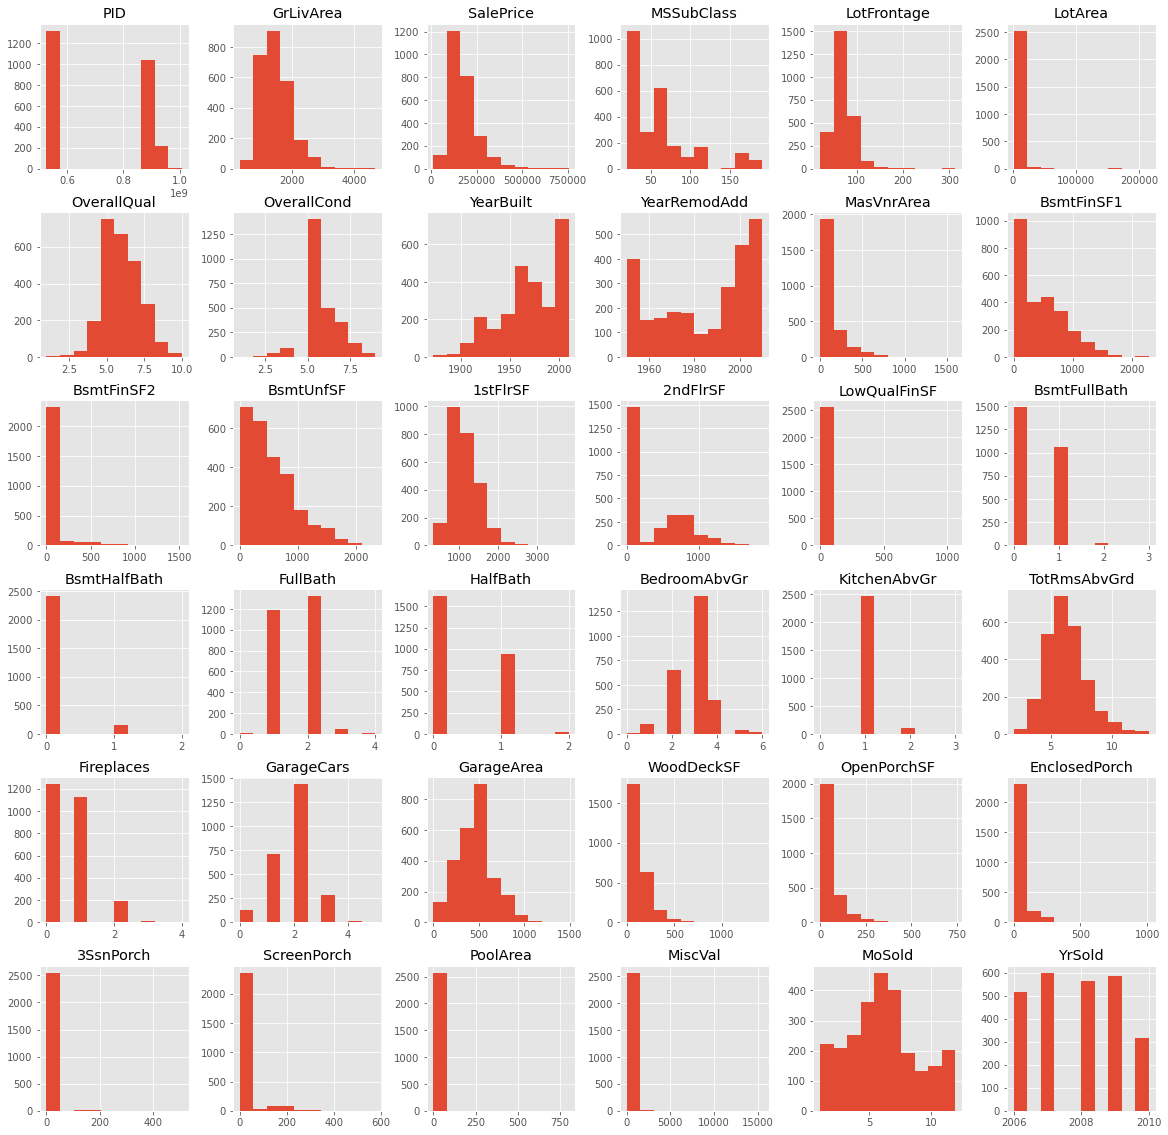

In [152]:
#Histohram of all numeric variables
data_House_price.hist(figsize=(20,20))

In [153]:

np.sum(data_House_price['LotFrontage'].isnull())

#print(data_House_price['Gara'].value_counts())

data_House_price['HalfBath'].unique()

array([0, 1, 2], dtype=int64)

In [154]:
data_House_price.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

In [ ]:
# from sklearn import linear_model
# ols = linear_model.LinearRegression()
# ols.fit([data_House_price['GarageArea']], data_House_price['GarageCars'])   #### What happen if we remove the ‘reshape’ method?
# print('beta_1: %.3f' %ols.coef_)
# print('beta_0: %.3f' %ols.intercept_)

In [155]:
#Relationship between GarageArea and GarageCars
y=data_House_price['GarageArea']

x=data_House_price['GarageCars']

#grp=data_House_price.groupby('GarageCars').mean()


# ga_area = data_House_price.groupby(['GarageCars'])[['GarageArea']].mean()
# plt.scatter(ga_area.index, ga_area['GarageArea'])
# ga_area
data_House_price.groupby(['GarageCars'])[['GarageArea']].mean()


,GarageArea
GarageCars,
0.0,0.000000
1.0,299.785112
2.0,517.661571
3.0,807.680702
4.0,988.714286
5.0,1184.000000


In [156]:
#numerical variables
numerical_variables=data_House_price.select_dtypes(exclude=["bool_","object_"])


In [157]:
#categorical variables
categorical_variables=data_House_price.select_dtypes(exclude=["number"])
categorical_variables

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
1,RL,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,...,1939.0,Unf,TA,TA,Y,NA,NA,NA,WD,Normal
2,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,...,1984.0,Fin,TA,TA,Y,NA,NA,NA,WD,Normal
3,C (all),Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,...,1930.0,Unf,TA,Po,N,NA,NA,NA,WD,Normal
4,RL,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,...,1940.0,Unf,TA,TA,N,NA,NA,NA,WD,Normal
5,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,2001.0,Fin,TA,TA,Y,NA,NA,NA,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2576,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,...,1916.0,Unf,Fa,Po,P,NA,NA,NA,WD,Normal
2577,RL,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,...,1955.0,Unf,TA,TA,Y,NA,NA,NA,WD,Normal
2578,RH,Pave,NA,Reg,HLS,AllPub,Inside,Gtl,Crawfor,Norm,...,1949.0,Unf,TA,TA,Y,NA,NA,NA,WD,Normal
2579,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2000.0,Fin,TA,TA,Y,NA,NA,NA,WD,Normal


In [158]:
#categorical variables distribution and analysis
categorical_columns=categorical_variables.columns

for feature in categorical_columns:
    print(data_House_price[feature].value_counts())
    print('')
    


RL         2007
RM          418
FV          113
RH           21
C (all)      17
I (all)       2
A (agr)       1
Name: MSZoning, dtype: int64

Pave    2569
Grvl      10
Name: Street, dtype: int64

NA      2411
Grvl     105
Pave      63
Name: Alley, dtype: int64

Reg    1640
IR1     855
IR2      71
IR3      13
Name: LotShape, dtype: int64

Lvl    2337
Bnk      95
HLS      95
Low      52
Name: LandContour, dtype: int64

AllPub    2577
NoSewr       2
Name: Utilities, dtype: int64

Inside     1885
Corner      439
CulDSac     164
FR2          78
FR3          13
Name: LotConfig, dtype: int64

Gtl    2458
Mod     108
Sev      13
Name: LandSlope, dtype: int64

NAmes      410
CollgCr    236
OldTown    213
Edwards    165
Somerst    143
Gilbert    143
Sawyer     139
NWAmes     123
NridgHt    121
SawyerW    113
Mitchel    104
BrkSide    103
Crawfor     92
IDOTRR      76
NoRidge     67
Timber      54
StoneBr     43
SWISU       42
ClearCr     40
MeadowV     34
BrDale      29
Blmngtn     23
Veenker   

In [159]:
data_House_price.loc[data_House_price['MSZoning']=='C (all)']

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
3,911128020,1001,124900,30,C (all),60.000000,6060,Pave,NA,Reg,...,0,0,NA,NA,NA,0,11,2007,WD,Normal
128,911102180,1049,80900,50,C (all),52.000000,5150,Pave,NA,Reg,...,0,0,NA,NA,NA,0,5,2008,WD,Normal
167,911175440,1396,115000,190,C (all),50.000000,9000,Pave,NA,Reg,...,0,0,NA,NA,NA,0,10,2006,WD,Abnorml
255,902332030,2291,133900,190,C (all),60.000000,7200,Pave,NA,Reg,...,99,0,NA,NA,NA,0,11,2007,WD,Normal
559,902477120,720,34900,30,C (all),60.000000,7879,Pave,NA,Reg,...,0,0,NA,GdWo,NA,0,11,2009,WD,Abnorml
645,911175430,480,35311,20,C (all),50.000000,9000,Pave,NA,Reg,...,0,0,NA,NA,NA,0,10,2006,WD,Abnorml
671,911128180,1128,68400,50,C (all),60.000000,7500,Pave,NA,Reg,...,0,0,NA,NA,NA,0,4,2010,COD,Abnorml
741,911102170,1317,40000,70,C (all),50.000000,8500,Pave,Pave,Reg,...,0,0,NA,MnPrv,NA,0,7,2008,WD,Normal
835,911226010,894,81000,30,C (all),120.000000,18000,Grvl,NA,Reg,...,0,0,NA,NA,Shed,560,8,2008,ConLD,Normal
1337,911226030,864,65000,70,C (all),60.000000,9000,Grvl,NA,Reg,...,0,0,NA,NA,NA,0,6,2008,WD,Normal


In [ ]:
#categorical_columns['Electrical'].value_counts()

In [160]:
#Null count in categorical
for feature in categorical_columns:
    print(feature)
    print(np.sum(data_House_price[feature].isnull()))
    print('')

MSZoning
0

Street
0

Alley
0

LotShape
0

LandContour
0

Utilities
0

LotConfig
0

LandSlope
0

Neighborhood
0

Condition1
0

Condition2
0

BldgType
0

HouseStyle
0

RoofStyle
0

RoofMatl
0

Exterior1st
0

Exterior2nd
0

MasVnrType
0

ExterQual
0

ExterCond
0

Foundation
0

BsmtQual
0

BsmtCond
0

BsmtExposure
0

BsmtFinType1
0

BsmtFinType2
0

TotalBsmtSF
0

Heating
0

HeatingQC
0

CentralAir
0

Electrical
0

KitchenQual
0

Functional
0

FireplaceQu
0

GarageType
0

GarageYrBlt
0

GarageFinish
0

GarageQual
0

GarageCond
0

PavedDrive
0

PoolQC
0

Fence
0

MiscFeature
0

SaleType
0

SaleCondition
0



In [161]:
#Null count in numerical variables
for nfeature in numerical_variables:
    print(nfeature)
    print(np.sum(data_House_price[nfeature].isnull()))
    print('')

PID
0

GrLivArea
0

SalePrice
0

MSSubClass
0

LotFrontage
0

LotArea
0

OverallQual
0

OverallCond
0

YearBuilt
0

YearRemodAdd
0

MasVnrArea
0

BsmtFinSF1
0

BsmtFinSF2
0

BsmtUnfSF
0

1stFlrSF
0

2ndFlrSF
0

LowQualFinSF
0

BsmtFullBath
0

BsmtHalfBath
0

FullBath
0

HalfBath
0

BedroomAbvGr
0

KitchenAbvGr
0

TotRmsAbvGrd
0

Fireplaces
0

GarageCars
0

GarageArea
0

WoodDeckSF
0

OpenPorchSF
0

EnclosedPorch
0

3SsnPorch
0

ScreenPorch
0

PoolArea
0

MiscVal
0

MoSold
0

YrSold
0



In [162]:
#correlation between numerical variables
corr_numerical_matrix = numerical_variables.corr(method ='pearson')
corr_numerical_matrix

,PID,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
PID,1.000000,-0.102485,-0.226410,-0.005257,-0.087511,0.041946,-0.246941,0.119904,-0.337693,-0.128180,...,-0.199589,-0.041592,-0.054581,0.168961,-0.021163,-0.032351,-0.006506,-0.022490,-0.059359,0.002799
GrLivArea,-0.102485,1.000000,0.719980,0.070821,0.309074,0.260286,0.560125,-0.105739,0.228643,0.306512,...,0.476107,0.247890,0.321950,0.000263,0.008733,0.097582,0.057947,-0.003922,0.038694,-0.008007
SalePrice,-0.226410,0.719980,1.000000,-0.084574,0.332631,0.274427,0.790661,-0.101123,0.544569,0.514720,...,0.634706,0.333332,0.306629,-0.123209,0.031269,0.121392,0.030849,-0.018869,0.012725,-0.001261
MSSubClass,-0.005257,0.070821,-0.084574,1.000000,-0.402105,-0.198025,0.056422,-0.075520,0.053792,0.056671,...,-0.091358,-0.017710,-0.007698,-0.028561,-0.041806,-0.055012,-0.013435,-0.027233,0.007147,-0.025459
LotFrontage,-0.087511,0.309074,0.332631,-0.402105,1.000000,0.330942,0.163019,-0.046359,0.086987,0.055080,...,0.309299,0.102743,0.133337,0.005202,0.022842,0.077640,0.085269,0.003793,0.004878,-0.006202
LotArea,0.041946,0.260286,0.274427,-0.198025,0.330942,1.000000,0.080701,-0.032731,0.012510,0.010478,...,0.199195,0.155787,0.085048,0.017734,0.017732,0.053665,0.052643,0.040231,0.010377,-0.017174
OverallQual,-0.246941,0.560125,0.790661,0.056422,0.163019,0.080701,1.000000,-0.095839,0.574278,0.546157,...,0.538249,0.250016,0.286714,-0.134417,0.014199,0.049816,-0.002500,-0.025857,0.016328,0.005255
OverallCond,0.119904,-0.105739,-0.101123,-0.075520,-0.046359,-0.032731,-0.095839,1.000000,-0.397229,0.065353,...,-0.168336,0.014261,-0.067353,0.085962,0.041918,0.050222,-0.021186,0.046029,0.012422,0.017824
YearBuilt,-0.337693,0.228643,0.544569,0.053792,0.086987,0.012510,0.574278,-0.397229,1.000000,0.572041,...,0.463873,0.227066,0.179431,-0.361158,0.009476,-0.042013,0.004904,-0.027398,-0.008154,0.014804
YearRemodAdd,-0.128180,0.306512,0.514720,0.056671,0.055080,0.010478,0.546157,0.065353,0.572041,1.000000,...,0.347432,0.217936,0.226371,-0.205549,0.028495,-0.042087,-0.018738,-0.016740,0.001485,0.063208


In [163]:
#Top 20 most and 5 least correlated features to 'SalePrice'
higly_corr=corr_numerical_matrix['SalePrice'].nlargest(20)

negatively_corr=corr_numerical_matrix['SalePrice'].nsmallest(5)

print('higly_corr: ',higly_corr)
print('negatively_corr: ',negatively_corr)

higly_corr:  SalePrice       1.000000
OverallQual     0.790661
GrLivArea       0.719980
1stFlrSF        0.642623
GarageCars      0.638640
GarageArea      0.634706
YearBuilt       0.544569
FullBath        0.535175
YearRemodAdd    0.514720
MasVnrArea      0.500494
TotRmsAbvGrd    0.490206
Fireplaces      0.488173
BsmtFinSF1      0.461056
WoodDeckSF      0.333332
LotFrontage     0.332631
OpenPorchSF     0.306629
BsmtFullBath    0.290867
HalfBath        0.285861
LotArea         0.274427
2ndFlrSF        0.263115
Name: SalePrice, dtype: float64
negatively_corr:  PID             -0.226410
EnclosedPorch   -0.123209
KitchenAbvGr    -0.113962
OverallCond     -0.101123
MSSubClass      -0.084574
Name: SalePrice, dtype: float64


In [164]:
#Top 5 most and 3 least correlated features to all numerical features
for nfeature in numerical_variables:
    print('Feature: ',nfeature)
    higly_corr=corr_numerical_matrix[nfeature].nlargest(6)
    higly_corr=higly_corr.drop([nfeature])
    negatively_corr=corr_numerical_matrix[nfeature].nsmallest(3)
    print('higly_corr: ',sep='\n')
    print(higly_corr)
    print('negatively_corr: ', sep='\n')
    print(negatively_corr)
    print('')



Feature:  PID
higly_corr: 
EnclosedPorch    0.168961
OverallCond      0.119904
LowQualFinSF     0.058221
KitchenAbvGr     0.047850
LotArea          0.041946
Name: PID, dtype: float64
negatively_corr: 
YearBuilt     -0.337693
OverallQual   -0.246941
MasVnrArea    -0.228836
Name: PID, dtype: float64

Feature:  GrLivArea
higly_corr: 
TotRmsAbvGrd    0.807432
SalePrice       0.719980
2ndFlrSF        0.664967
FullBath        0.644277
OverallQual     0.560125
Name: GrLivArea, dtype: float64
negatively_corr: 
OverallCond    -0.105739
PID            -0.102485
BsmtHalfBath   -0.053456
Name: GrLivArea, dtype: float64

Feature:  SalePrice
higly_corr: 
OverallQual    0.790661
GrLivArea      0.719980
1stFlrSF       0.642623
GarageCars     0.638640
GarageArea     0.634706
Name: SalePrice, dtype: float64
negatively_corr: 
PID             -0.226410
EnclosedPorch   -0.123209
KitchenAbvGr    -0.113962
Name: SalePrice, dtype: float64

Feature:  MSSubClass
higly_corr: 
2ndFlrSF        0.306995
KitchenAbvG

In [171]:
import plotly.express as plt
fig_corr_numerical = plt.imshow(corr_numerical_matrix, text_auto=True, aspect="auto")
fig_corr_numerical.show()
#fig_corr_numerical.write_html("independent.html")

In [119]:
#Working with Large Datasets as a Data Scientist (with Python)

In [166]:
#creating new column since built or remodeled
data_House_price['YearRemodAdd']
todays_date = date.today()

data_House_price['YearSinceBuiltRemodeled']=todays_date.year-data_House_price['YearRemodAdd']

data_House_price['YearSinceBuiltRemodeled']



C:\Users\Monika\AppData\Local\Temp\ipykernel_21500\778217382.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1       72
2       38
3       15
4       19
5       21
        ..
2576    72
2577    67
2578    72
2579    22
2580    28
Name: YearSinceBuiltRemodeled, Length: 2579, dtype: int64

In [167]:
tmp_gr_1st_2nd=data_House_price.loc[data_House_price['GrLivArea']!=data_House_price['1stFlrSF']+data_House_price['2ndFlrSF']]
tmp_gr_1st_2nd[['GrLivArea','1stFlrSF','2ndFlrSF']]

,GrLivArea,1stFlrSF,2ndFlrSF
171,2377,1313,0
182,935,779,0
206,1484,866,504
212,1200,520,600
220,1522,1008,0
340,1382,854,0
470,2358,938,1215
475,1656,808,704
676,1531,1169,0
767,1480,1044,0


In [173]:
#Investigation of TotalBsmtSF and BsmtFinSF1 and BsmtFinSF2
data_House_price['BsmtFinSF1']
print(np.sum(data_House_price['TotalBsmtSF']!=data_House_price['BsmtFinSF1']+data_House_price['BsmtFinSF2']))

tmp_bsmt_check=data_House_price.loc[data_House_price['TotalBsmtSF']!=data_House_price['BsmtFinSF1']+data_House_price['BsmtFinSF2']]
tmp_bsmt_check[['TotalBsmtSF','BsmtFinSF1','BsmtFinSF2']]


2363


,TotalBsmtSF,BsmtFinSF1,BsmtFinSF2
1,856.0,238.0,0.0
2,1049.0,552.0,393.0
3,837.0,737.0,0.0
4,405.0,0.0,0.0
5,810.0,643.0,0.0
...,...,...,...
2575,796.0,0.0,0.0
2576,952.0,0.0,0.0
2578,1001.0,284.0,0.0
2579,985.0,841.0,0.0


0.4810092393676929


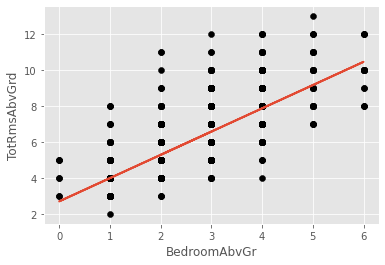

                            OLS Regression Results                            
Dep. Variable:           TotRmsAbvGrd   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     2388.
Date:                Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                        17:07:16   Log-Likelihood:                -3919.1
No. Observations:                2579   AIC:                             7842.
Df Residuals:                    2577   BIC:                             7854.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6977      0.079     34.335      0.0

In [174]:
#Investigation of trelationship between TotRmsAbvGrd and number of bedrooms
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.api import OLS

data_House_price[['TotRmsAbvGrd','BedroomAbvGr']]

np.sum(data_House_price['BedroomAbvGr'].isnull())

ols = linear_model.LinearRegression()
x=data_House_price['BedroomAbvGr'].values.reshape(-1,1)
y=data_House_price['TotRmsAbvGrd']
lm_test1=ols.fit(x, y)

print(lm_test1.score(x, y))

plt.plot(x, ols.predict(x), lw=2)
## plot the data points
plt.scatter(x, y, c='k')
plt.xlabel('BedroomAbvGr')
plt.ylabel('TotRmsAbvGrd')
plt.show()



###################Summary

features = sm.add_constant(x)
ols_sm   = OLS(y,features)
lm_test1_1    = ols_sm.fit()

print(lm_test1_1.summary())

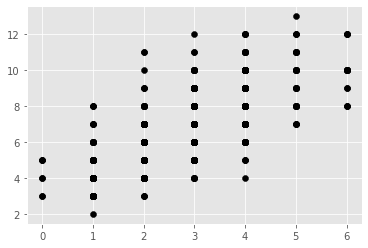

In [175]:
tst_x=data_House_price['LotArea']
tst_y=data_House_price['SalePrice']
plt.scatter(x, y, c='k')


In [176]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
#Numerical:
#LotArea, GrLivArea, YearBuilt,BedroomAbvGr,

#Nominal Categorical:
    
    #BldgType :1Fam,2FmCon,TwnhsE,Twnhs,Duplex
    #OverallQual
    #OverallCond
    #LandSlope: Gtl,Mod,Sev
    
#conditional:
    #PavedDrive,MSZoning
    
multi_linear_var=data_House_price[['SalePrice','LotArea', 'GrLivArea', 'BedroomAbvGr','LandSlope','YearBuilt','MSZoning','BldgType','OverallQual','OverallCond','PavedDrive']]    

multi_linear_var

enc = OrdinalEncoder()
enc.fit(multi_linear_var[["OverallQual","BldgType","OverallCond","LandSlope"]])
multi_linear_var[["OverallQual","BldgType","OverallCond","LandSlope"]] = enc.transform(multi_linear_var[["OverallQual","BldgType","OverallCond","LandSlope"]])

# onehot_encoder = OneHotEncoder(sparse=False, drop="first")
# print(onehot_encoder.fit_transform(multi_linear_var[["PavedDrive"]]))
multi_linear_var = pd.get_dummies(multi_linear_var, columns = ['PavedDrive'],drop_first = True)
multi_linear_var = pd.get_dummies(multi_linear_var, columns = ['MSZoning'],drop_first = True)


#x2=multi_linear_var[['LotArea', 'GrLivArea', 'BedroomAbvGr','LandSlope','YearBuilt','MSZoning','BldgType','OverallQual','OverallCond','PavedDrive']]
x2=multi_linear_var.iloc[: , 1:]
y2=multi_linear_var['SalePrice']

#print(multi_linear_var.iloc[: , 1:])

ols2 = linear_model.LinearRegression()
lm_test2=ols2.fit(x2, y2)

print(lm_test2.score(x2, y2))


###################Summary

features2 = sm.add_constant(x2)
ols_sm2   = OLS(y2,features2)
lm_test2_1    = ols_sm2.fit()

print(lm_test2_1.summary())

# print(data_House_price['LandSlope'].value_counts())
# np.sum(data_House_price['OverallCond'].isnull())

0.8116536008490596
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     690.0
Date:                Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                        17:07:25   Log-Likelihood:                -30458.
No. Observations:                2579   AIC:                         6.095e+04
Df Residuals:                    2562   BIC:                         6.105e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.2

C:\Users\Monika\AppData\Local\Temp\ipykernel_21500\725691978.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Monika\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.

